In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
%matplotlib inline

In [7]:
zf = zipfile.ZipFile('WA_Fn-UseC_-Telco-Customer-Churn.zip') 
df = pd.read_csv(zf.open('WA_Fn-UseC_-Telco-Customer-Churn.csv'))

In [8]:
print("Rows:",    df.shape[0])
print("Cols:",    df.shape[1])

Rows: 7043
Cols: 21


### Dealing with Null Values

In [92]:
## No NULL values per column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# TotalCharges column is blank for customers with tenure=0. 
df.loc[df['tenure']==0, ['customerID','TotalCharges']].head()

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,


In [26]:
# We'll fill these cells with 0
df.loc[df['tenure']==0, 'TotalCharges'] = 0

In [29]:
#Updating MonthlyCharges and TotalCharges to data type float
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x))
df['MonthlyCharges'] = df['MonthlyCharges'].apply(lambda x: float(x))

### Exploratory Data Analysis
The target variable is churn. Companies want to know what is driving their customers to leave for one of their competitors. It is important to find out how the variables (data collected by company) relate to the target variable churn.

* Breakdown of the target variable: 27% of customers churned vs 73% of customer stayed with current telecom provider. **Pie Chart**  
* Counts for each categorical variables with a view of whether the person churned or not. For example, senior citizens are more likely to have churned than non-senior citizens. **Count Plots**  
* Distribution plot for each of the continuous variables in the dataset. **Distribution Plots**  
* Correlation analysis for all relevant variables in dataset. Includes dummy variable data preparation. **Correlation Matrix**

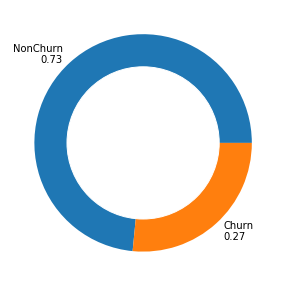

No     5174
Yes    1869
Name: Churn, dtype: int64

In [80]:
#create data
plt.figure(figsize=(10,5))
churn_counts = df['Churn'].value_counts().to_list()
size_of_groups=[i for i in churn_counts]
 
# Create a pieplot
plt.pie(size_of_groups,  
        labels=['NonChurn'+ '\n' + str(round(churn_counts[0]/df.shape[0],2)), 'Churn' + '\n' + str(round(churn_counts[1]/df.shape[0],2))], )
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

df['Churn'].value_counts()

#https://python-graph-gallery.com/donut-plot/

In [121]:
tmp = df.columns.to_list()
tmp.remove('customerID'),tmp.remove('tenure'),tmp.remove('MonthlyCharges'),tmp.remove('TotalCharges'), tmp.remove('Churn')

(None, None, None, None, None)

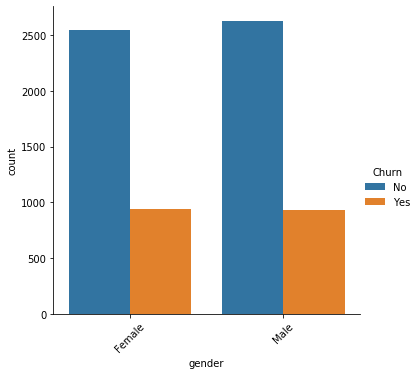

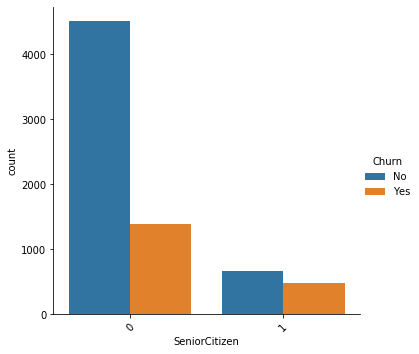

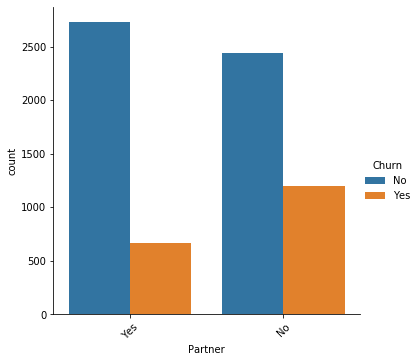

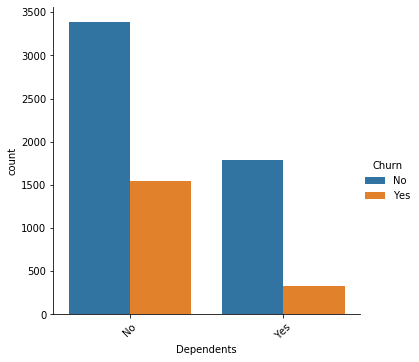

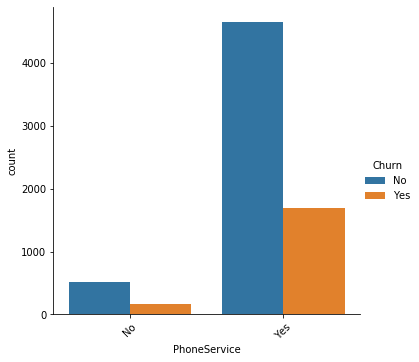

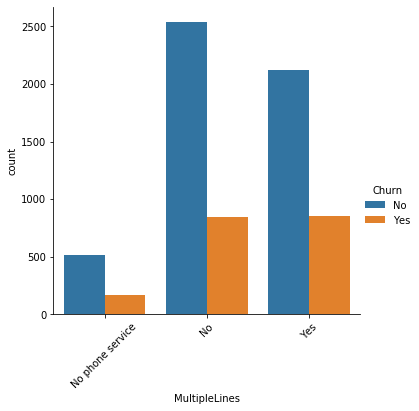

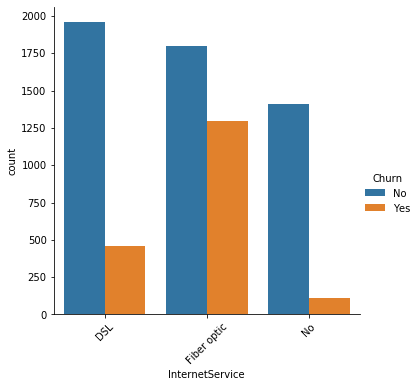

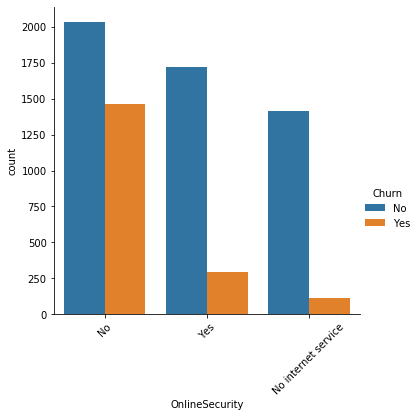

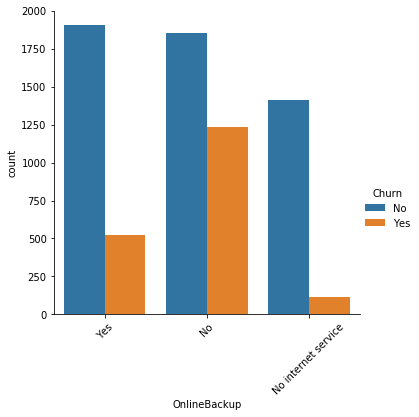

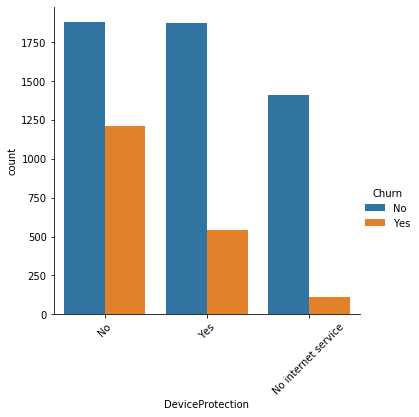

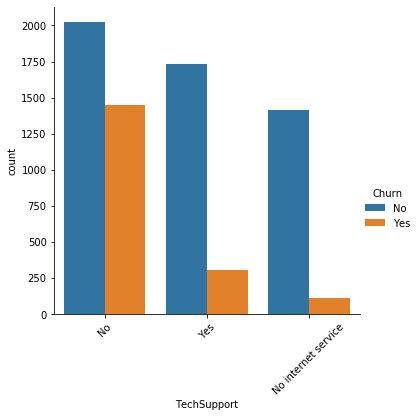

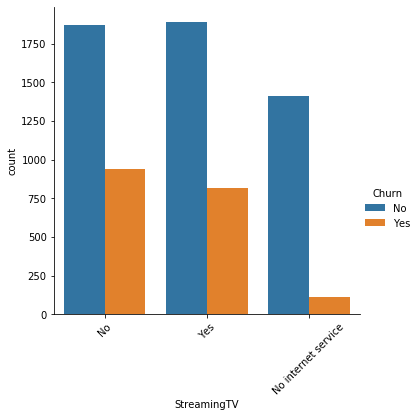

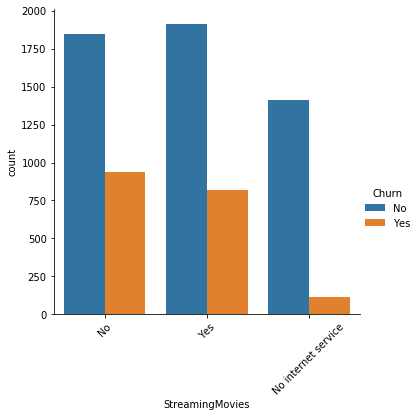

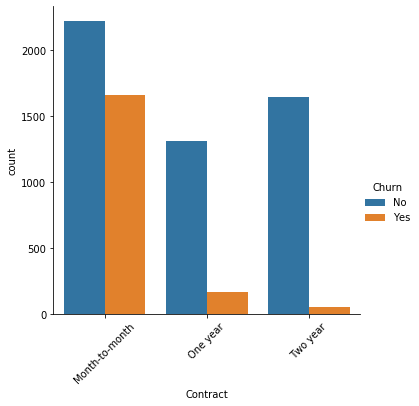

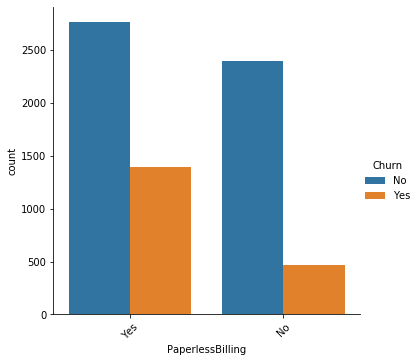

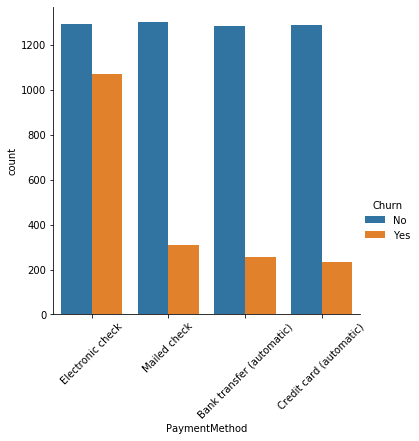

In [124]:
for i in tmp:
    plot=sns.catplot(x=i, hue='Churn', kind="count", data=df)
    plot.set_xticklabels(rotation=45)

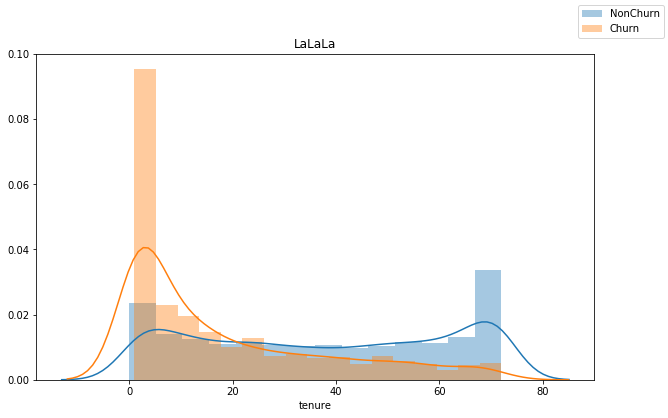

In [150]:
fig = plt.figure(figsize=(10,6))
sns.distplot(a=df.loc[df.Churn=='No','tenure']).set_title("Tenure")
sns.distplot(a=df.loc[df.Churn=='Yes','tenure'])
fig.legend(labels = ['NonChurn', 'Churn'], loc='upper right')
plt.show()

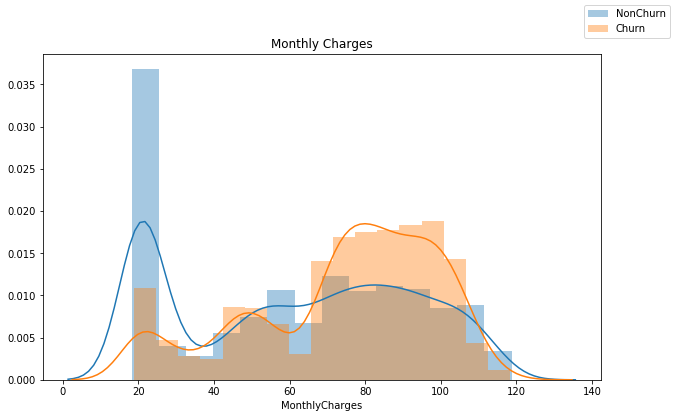

In [151]:
fig = plt.figure(figsize=(10,6))
sns.distplot(a=df.loc[df.Churn=='No','MonthlyCharges']).set_title("Monthly Charges")
sns.distplot(a=df.loc[df.Churn=='Yes','MonthlyCharges'])
fig.legend(labels = ['NonChurn', 'Churn'], loc='upper right')
plt.show()

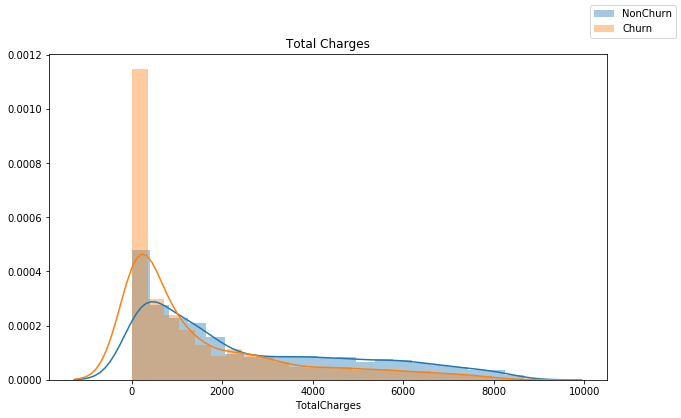

In [152]:
fig = plt.figure(figsize=(10,6))
sns.distplot(a=df.loc[df.Churn=='No','TotalCharges']).set_title("Total Charges")
sns.distplot(a=df.loc[df.Churn=='Yes','TotalCharges'])
fig.legend(labels = ['NonChurn', 'Churn'], loc='upper right')
plt.show()

In [153]:
df_dummy = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                           'PaperlessBilling','PaymentMethod', 'Churn'], drop_first=True)



df_dummy.drop(labels=['customerID'], axis=1 , inplace=True)

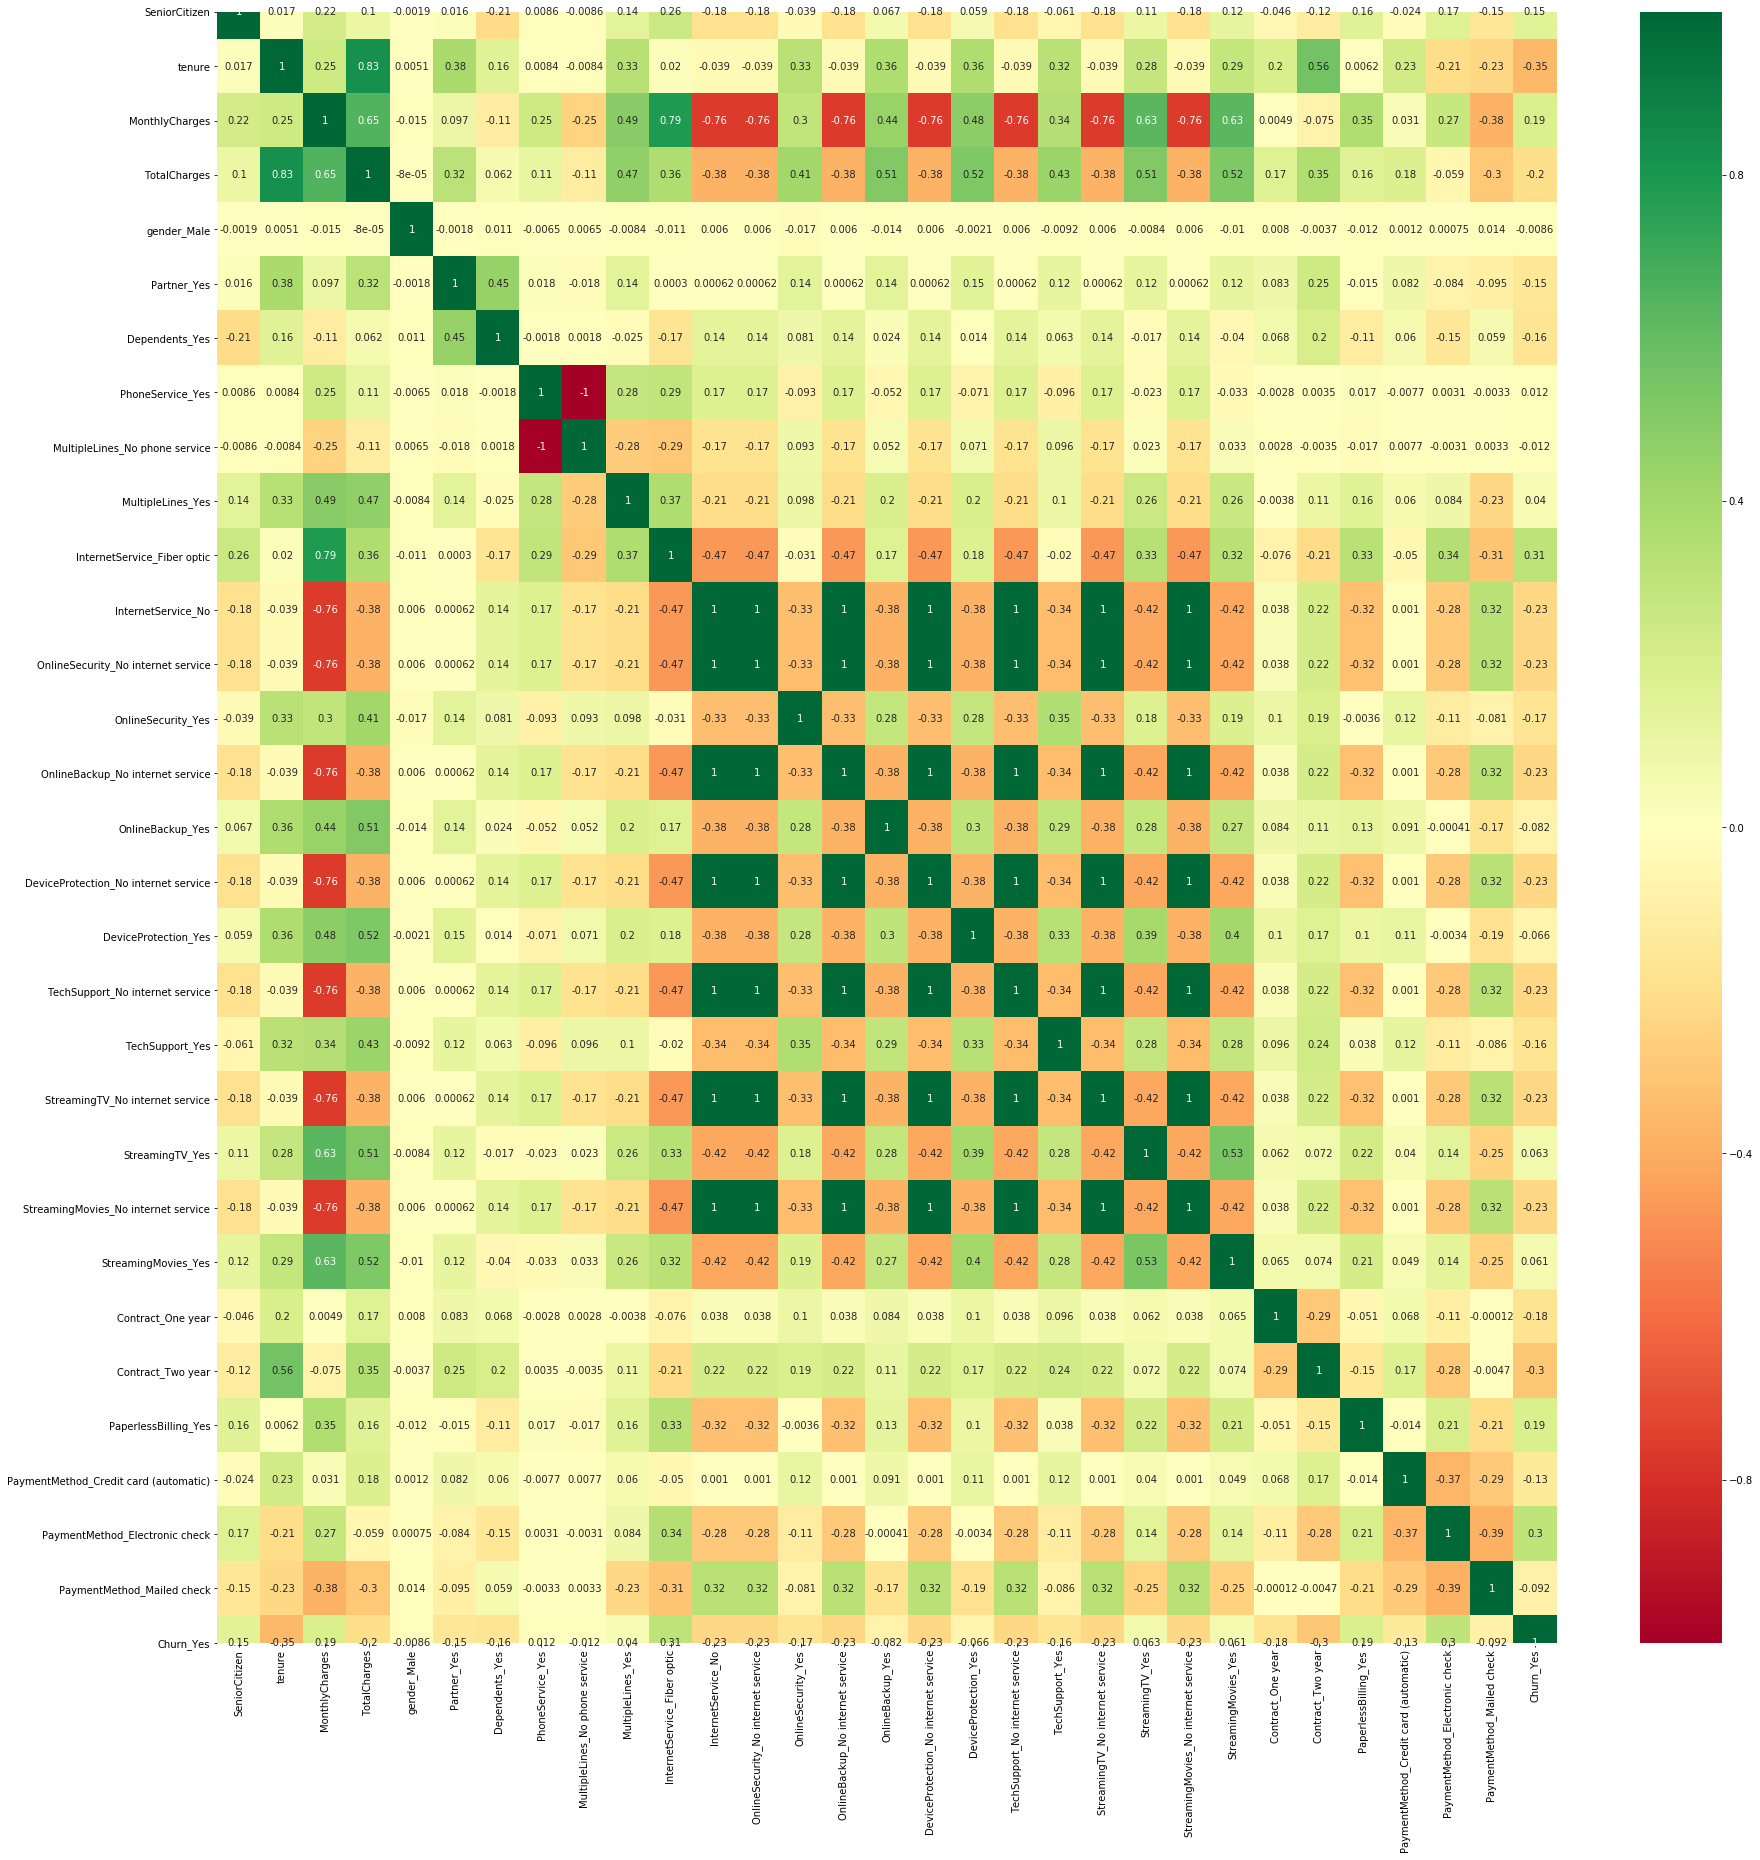

In [155]:
#df_dummy.shape
#(7043, 31)

X = df_dummy.iloc[:,0:30]
y = df_dummy.iloc[:,-1]

#get correlations of each features in dataset
corrmat = df_dummy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df_dummy[top_corr_features].corr(),annot=True,cmap="RdYlGn")